#**Linear Regression(SGD)**



---
Importing the required packages


---



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import california_housing
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns;
import random



---
Using the same dataset **california_housing** try to find the best fit of the dataset by implementing stocastic gradient descent from scratch. 


---



In [2]:
housing_data = california_housing.fetch_california_housing()

In [3]:
Features = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
Target = pd.DataFrame(housing_data.target, columns=['Target'])
df = Features.join(Target)

In [4]:
df = df[df.Target < 5]

In [5]:
X = df.MedInc
y = df.Target

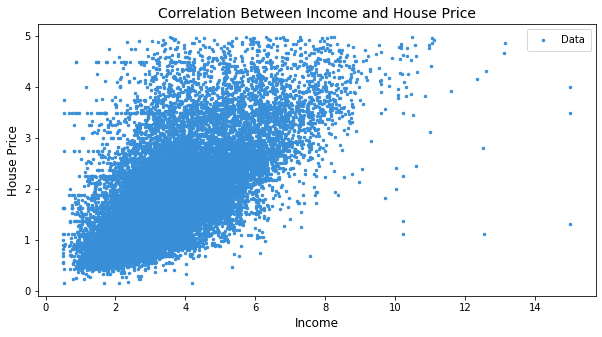

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data', c='#388fd8', s=6)
plt.title('Correlation Between Income and House Price', fontSize=14)
plt.xlabel('Income', fontSize=12)
plt.ylabel('House Price', fontSize=12)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()

In [7]:
def SGD(X,y,lr = 0.01,epochs=100,batch_size = 1):
    X = np.array(X)
    y = np.array(y)
    m,b = 0.1,0.1
    mse = []
    for i in range(epochs):
        ix = np.random.randint(len(X))
        Xs = X[ix]
        ys = y[ix]
        f = ys - (m*Xs + b)
        # Updating parameters m and b
        m -= lr * (-2 * np.sum(np.dot(Xs,f)) / batch_size)
        b -= lr * (-2 * np.sum(f) / batch_size)
        mse.append(mean_squared_error(y, m*X+b))        
    return m, b, mse

In [8]:
m, b,  mse = SGD(X, y, lr=0.01, epochs=100, batch_size=2)

Plot the SGD curve(MSE against the epochs), and the line which represents the best fit of the given dataset.

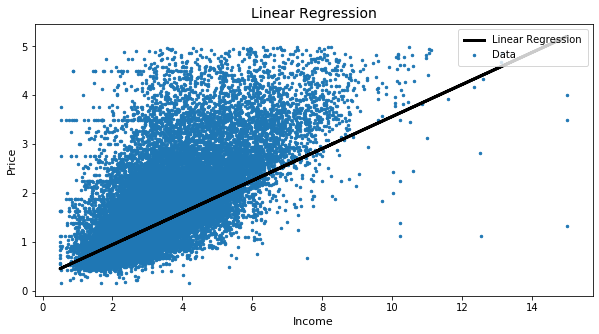

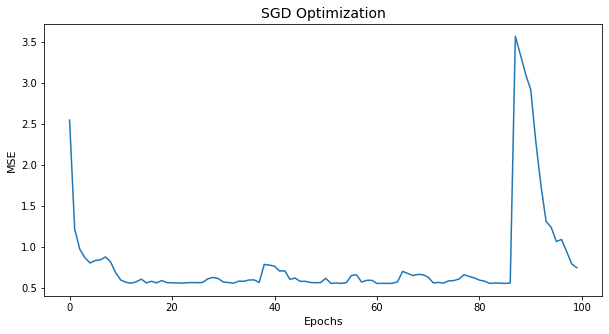

In [9]:
y_pred = m*X + b

plt.figure(figsize=(10,5))
plt.scatter(X, y, label='Data',s=6)
plt.plot(X, y_pred, c='black', lw=3, label='Linear Regression')
plt.title('Linear Regression', fontSize=14)
plt.xlabel('Income', fontSize=11)
plt.ylabel('Price', fontSize=11)
plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
plt.show()


plt.figure(figsize=(10,5))
plt.plot(range(len(mse)), mse)
plt.title('SGD Optimization', fontSize=14)
plt.xlabel('Epochs', fontSize=11)
plt.ylabel('MSE', fontSize=11)
plt.show()

#**SVM**

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA



---


**Generating Random linearly separable data**


---



In [11]:
data = [[np.random.rand(), np.random.rand()] for i in range(10)]
for i, point in enumerate(data):
  x, y = point
  if 0.5*x - y + 0.25 > 0:
    data[i].append(-1)
  else:
    data[i].append(1)



---


**Visualizing the above data**


---



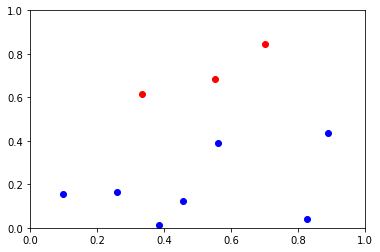

In [12]:
for x, y, l in data:
  if l == 1: 
    clr = 'red'
  else: 
    clr = 'blue'
  plt.scatter(x, y, c=clr)
  plt.xlim(0,1)
  plt.ylim(0,1)



---


**Train a SVM classifier using gradient descent and return a Weight Matrix which is a numpy array of length (N + 1) where N is dimension of training samples. You can refer to Fig. 1 in [this](https://www.cs.huji.ac.il/~shais/papers/ShalevSiSrCo10.pdf) paper for implementation. You can add arguments to svm_function according to your implementation.**


---



In [13]:
def svm_function(x, y, epoch, l_rate,lam=0.00000001):
    w=np.zeros(2)
    b = 0
    for i in range(epoch):
        j=int(np.random.random()*len(y))
        if y[j]*(np.dot(x[j],w)+b)<1:
            w -= l_rate*(2*lam*w-np.dot(x[j],y[j]))
            b += l_rate*y[j]
        else:
            w -= l_rate*(2*lam*w)
    return [b,w[0],w[1]]



---


**Run SVM Classifier**


---



In [14]:
data = np.asarray(data)
X = data[:,:2]
Y = data[:,2]
w = svm_function(X, Y, 10000, 1)

# **Visualize the classifier**


---

Write a code to draw a lines corrosponding to 'w' vector you got as output from svm_function and for a line from which actual data was generated (0.5*x - y + 0.25). 

---



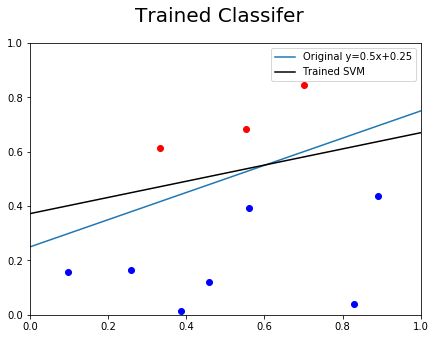

In [15]:
x1, y1 = [0, 1], [-w[0]/w[2], (-w[0]-w[1])/w[2]]
x2, y2 = [0, 1], [0.25, 0.75]
plt.rcParams["figure.figsize"] = (7,5)
plt.plot(x2, y2,label='Original y=0.5x+0.25')
plt.plot(x1, y1,label='Trained SVM',c='black')
for x, y, l in data:
    if l == 1: 
        clr = 'red'
    else: 
        clr = 'blue'
    plt.scatter(x, y, c=clr)
plt.xlim(0,1),plt.ylim(0,1)
plt.legend()
plt.suptitle('Trained Classifer', fontsize=20)
plt.show()